In [88]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from collections import defaultdict

# Initialize Faker for realistic data generation
fake = Faker()

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define industry categories and sub-industries
industries = {
    "Technology": ["Software Development", "Cloud Computing", "Cybersecurity", "Hardware Manufacturing", "Semiconductors"],
    "Finance": ["Commercial Banking", "Investment Banking", "Insurance", "Private Equity", "Fintech"],
    "Healthcare": ["Pharmaceuticals", "Medical Devices", "Hospital Systems", "Health Insurance", "Biotechnology"],
    "Retail": ["E-commerce", "Department Stores", "Grocery Chains", "Apparel", "Electronics"],
    "Manufacturing": ["Automotive", "Aerospace", "Industrial Equipment", "Chemicals", "Consumer Goods"],
    "Energy": ["Oil and Gas", "Renewable Energy", "Utilities", "Mining", "Nuclear"],
    "Telecommunications": ["Wireless Services", "Internet Providers", "Satellite Communications", "Network Equipment"],
    "Transportation": ["Airlines", "Logistics", "Railroads", "Shipping", "Ride Sharing"]
}

# Predefined lists of real US companies by industry (abbreviated for space)
real_companies = {
    "Technology": ["Apple", "Microsoft", "Google", "Amazon", "Facebook", "Intel", "IBM", "Oracle", "Cisco", "Adobe"],
    "Finance": ["JPMorgan Chase", "Bank of America", "Wells Fargo", "Goldman Sachs", "Morgan Stanley"],
    "Healthcare": ["Johnson & Johnson", "Pfizer", "UnitedHealth Group", "Merck", "AbbVie"],
    "Retail": ["Walmart", "Target", "Home Depot", "Lowe's", "Best Buy"],
    "Manufacturing": ["Boeing", "Lockheed Martin", "3M", "General Electric", "Honeywell"],
    "Energy": ["ExxonMobil", "Chevron", "ConocoPhillips", "NextEra Energy", "Duke Energy"],
    "Telecommunications": ["AT&T", "Verizon", "T-Mobile", "Comcast", "Charter Communications"],
    "Transportation": ["Delta Airlines", "United Airlines", "FedEx", "UPS", "CSX"]
}

# Generate additional realistic company names
def generate_company_name(industry):
    prefixes = {
        "Technology": ["Tech", "Cloud", "Data", "Digital", "Innovative", "Next", "Smart", "Global"],
        "Finance": ["First", "Capital", "Summit", "Heritage", "Liberty", "Premier", "Trust", "Security"],
        "Healthcare": ["Life", "Care", "Med", "Health", "Wellness", "Vital", "Bio", "Gen"],
        "Retail": ["Prime", "Select", "Urban", "Elite", "Value", "Super", "Mega", "Family"],
        "Manufacturing": ["Precision", "Industrial", "National", "American", "United", "Advanced", "Quality"],
        "Energy": ["Power", "Green", "Solar", "Eco", "Renew", "Bright", "Clean", "Future"],
        "Telecommunications": ["Net", "Connect", "Link", "Signal", "Wave", "Fiber", "Speed", "Bandwidth"],
        "Transportation": ["Swift", "Fast", "Reliable", "National", "Continental", "Eagle", "Trans", "Logix"]
    }
    
    suffixes = {
        "Technology": ["Technologies", "Solutions", "Systems", "Labs", "Networks", "Software", "Analytics"],
        "Finance": ["Financial", "Bank", "Capital", "Investments", "Advisors", "Wealth", "Partners"],
        "Healthcare": ["Health", "Care", "Medical", "Pharma", "Therapeutics", "Clinics", "Hospitals"],
        "Retail": ["Stores", "Goods", "Retail", "Outlet", "Market", "Shop", "Depot"],
        "Manufacturing": ["Manufacturing", "Industries", "Works", "Products", "Machinery", "Fabrication"],
        "Energy": ["Energy", "Power", "Resources", "Utilities", "Petroleum", "Renewables"],
        "Telecommunications": ["Communications", "Networks", "Telecom", "Wireless", "Broadband", "Media"],
        "Transportation": ["Logistics", "Transport", "Shipping", "Lines", "Freight", "Express"]
    }
    
    prefix = random.choice(prefixes[industry])
    suffix = random.choice(suffixes[industry])
    
    # Sometimes use a person's name
    if random.random() < 0.3:
        return f"{fake.last_name()} {suffix}"
    else:
        return f"{prefix} {suffix}"

# Generate realistic competitors for each company
def generate_competitors(company_name, industry, sub_industry):
    competitors = []
    
    # Start with real competitors if this is a real company
    if company_name in real_companies.get(industry, []):
        # Get other real companies in same industry
        potential_competitors = [c for c in real_companies[industry] if c != company_name]
        competitors.extend(random.sample(potential_competitors, min(3, len(potential_competitors))))
    
    # Add some generated competitors
    num_competitors = random.randint(2, 5)
    while len(competitors) < num_competitors:
        new_comp = generate_company_name(industry)
        if new_comp != company_name and new_comp not in competitors:
            competitors.append(new_comp)
    
    # Select toughest competitor
    toughest = random.choice(competitors)
    
    return competitors, toughest

# Generate realistic clients for each company
def generate_clients(company_name, industry):
    clients = []
    num_clients = random.randint(3, 8)
    
    # Clients are often from different industries
    for _ in range(num_clients):
        client_industry = random.choice([i for i in industries.keys() if i != industry])
        
        # 30% chance it's a real company
        if random.random() < 0.3 and real_companies.get(client_industry):
            client = random.choice(real_companies[client_industry])
        else:
            client = generate_company_name(client_industry)
        
        clients.append(client)
    
    # Select best client (highest revenue potential)
    best_client = random.choice(clients)
    
    return clients, best_client

# Generate company data
def generate_company_data(num_rows):
    data = []
    
    for _ in range(num_rows):
        # Select industry and sub-industry
        industry = random.choice(list(industries.keys()))
        sub_industry = random.choice(industries[industry])
        
        # Generate company name (30% chance to be a real company)
        if random.random() < 0.3 and real_companies.get(industry):
            company_name = random.choice(real_companies[industry])
        else:
            company_name = generate_company_name(industry)
        
        # Generate location
        city = fake.city()
        state = fake.state_abbr()
        
        # Generate founding year
        year_founded = random.randint(1950, 2020)
        
        # Generate revenue
        revenue = round(random.uniform(1, 100) * 1e6, 2)  # $1M-$100M
        
        # Generate competitors and toughest competitor
        competitors, toughest_competitor = generate_competitors(company_name, industry, sub_industry)
        
        # Generate clients and best client
        clients, best_client = generate_clients(company_name, industry)
        
        # Create data row
        row = {
            "Company Name": company_name,
            "Industry": industry,
            "Sub Industry": sub_industry,
            "City": city,
            "State": state,
            "Year Founded": year_founded,
            "Annual Revenue": revenue,
            "Competitors": ", ".join(competitors),
            "Toughest Competitor": toughest_competitor,
            "Clients": ", ".join(clients),
            "Best Client": best_client
        }
        
        data.append(row)
    
    return pd.DataFrame(data)

# Generate 10,000 rows of data
print("Generating 10,000 rows of company data...")
df = generate_company_data(10000)

# Save to CSV
df.to_csv("us_companies_with_competitors_clients.csv", index=False)
print("Data generation complete. Saved to us_companies_with_competitors_clients.csv")

# Display sample
print("\nSample of generated data:")
print(df.head())

Generating 10,000 rows of company data...
Data generation complete. Saved to us_companies_with_competitors_clients.csv

Sample of generated data:
          Company Name    Industry        Sub Industry             City State  \
0           Jones Bank     Finance  Commercial Banking  New Andrewshire    AL   
1     Wilson Analytics  Technology     Cloud Computing   Lake Kathystad    PR   
2  Martin Therapeutics  Healthcare     Medical Devices        Jonesland    GA   
3             Bio Care  Healthcare    Hospital Systems     Port Anthony    MI   
4  Premier Investments     Finance  Commercial Banking         Phamland    MH   

   Year Founded  Annual Revenue  \
0          1963     67993249.25   
1          1962     38632496.28   
2          1998     59992954.41   
3          1975     71581948.31   
4          1956     67663090.18   

                                         Competitors Toughest Competitor  \
0                  Thompson Financial, Heritage Bank  Thompson Financial   
1  N

In [89]:
df.head(5)

,Company Name,Industry,Sub Industry,City,State,Year Founded,Annual Revenue,Competitors,Toughest Competitor,Clients,Best Client
0,Jones Bank,Finance,Commercial Banking,New Andrewshire,AL,1963,67993249.25,"Thompson Financial, Heritage Bank",Thompson Financial,"Bio Care, Prime Depot, Rivers Networks, Wolfe ...",Bio Care
1,Wilson Analytics,Technology,Cloud Computing,Lake Kathystad,PR,1962,38632496.28,"Next Solutions, Tyler Software, Cloud Networks...",Tyler Software,"Prime Goods, Baker Logistics, Bright Power, Ha...",Baker Logistics
2,Martin Therapeutics,Healthcare,Medical Devices,Jonesland,GA,1998,59992954.41,"Wellness Therapeutics, Life Clinics, Wellness ...",Wellness Hospitals,"Delta Airlines, National Transport, First Advi...",Chavez Logistics
3,Bio Care,Healthcare,Hospital Systems,Port Anthony,MI,1975,71581948.31,"Vital Pharma, Frank Health, Marquez Medical, U...",Frank Health,"Graham Networks, Link Media, Eco Utilities",Graham Networks
4,Premier Investments,Finance,Commercial Banking,Phamland,MH,1956,67663090.18,"First Investments, Quinn Bank",Quinn Bank,"General Electric, Care Pharma, Swift Express, ...",Care Pharma


In [33]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sqlalchemy import create_engine

In [35]:
pip install ipython-sql sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [108]:
# Load SQL extension
%load_ext sql

# Connect to database
%sql sqlite:///company.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [113]:
# Create SQLite in-memory database
engine = create_engine('sqlite:///company.db')

# Save DataFrame to SQL database
df.to_sql('companies', engine, index=False, if_exists='replace')

In [114]:
%sql SELECT * FROM companies LIMIT 5;

 * sqlite:///company.db
   sqlite:///company_value.db
Done.


Company Name,Industry,Sub Industry,City,State,Year Founded,Annual Revenue,Competitors,Toughest Competitor,Clients,Best Client
Jones Bank,Finance,Commercial Banking,New Andrewshire,AL,1963,67993249.25,"Thompson Financial, Heritage Bank",Thompson Financial,"Bio Care, Prime Depot, Rivers Networks, Wolfe Lines, Continental Logistics, NextEra Energy, Johnson Networks",Bio Care
Wilson Analytics,Technology,Cloud Computing,Lake Kathystad,PR,1962,38632496.28,"Next Solutions, Tyler Software, Cloud Networks, Digital Solutions, Innovative Software",Tyler Software,"Prime Goods, Baker Logistics, Bright Power, Hall Products, AbbVie, Duke Energy, Stephens Works, Moore Hospitals",Baker Logistics
Martin Therapeutics,Healthcare,Medical Devices,Jonesland,GA,1998,59992954.41,"Wellness Therapeutics, Life Clinics, Wellness Hospitals, Care Medical, Gen Health",Wellness Hospitals,"Delta Airlines, National Transport, First Advisors, Intel, Chavez Logistics, Green Renewables, Data Solutions",Chavez Logistics
Bio Care,Healthcare,Hospital Systems,Port Anthony,MI,1975,71581948.31,"Vital Pharma, Frank Health, Marquez Medical, Underwood Therapeutics, Care Clinics",Frank Health,"Graham Networks, Link Media, Eco Utilities",Graham Networks
Premier Investments,Finance,Commercial Banking,Phamland,MH,1956,67663090.18,"First Investments, Quinn Bank",Quinn Bank,"General Electric, Care Pharma, Swift Express, Delta Airlines",Care Pharma


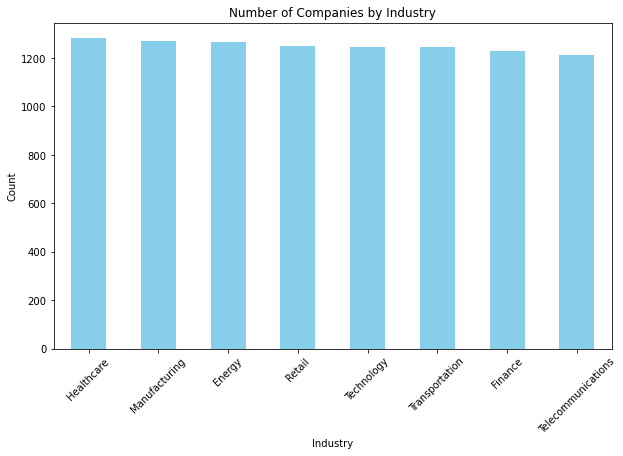

In [39]:
import matplotlib.pyplot as plt

# Industry distribution
industry_counts = df['Industry'].value_counts()
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Companies by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

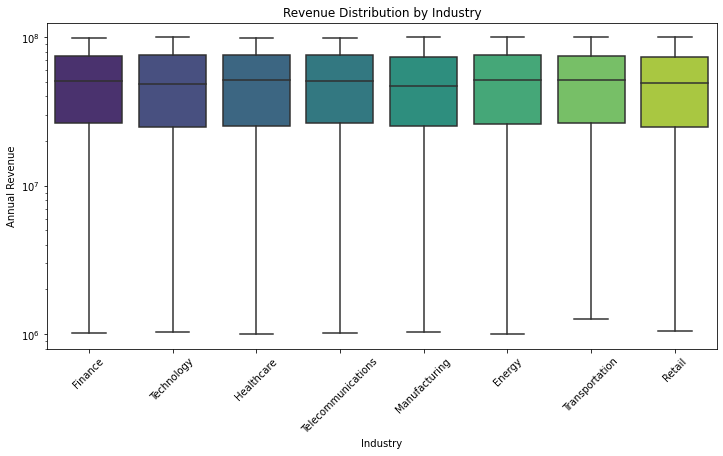

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='Industry', 
    y='Annual Revenue',
    palette='viridis'
)
plt.title('Revenue Distribution by Industry')
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale for better visibility
plt.show()

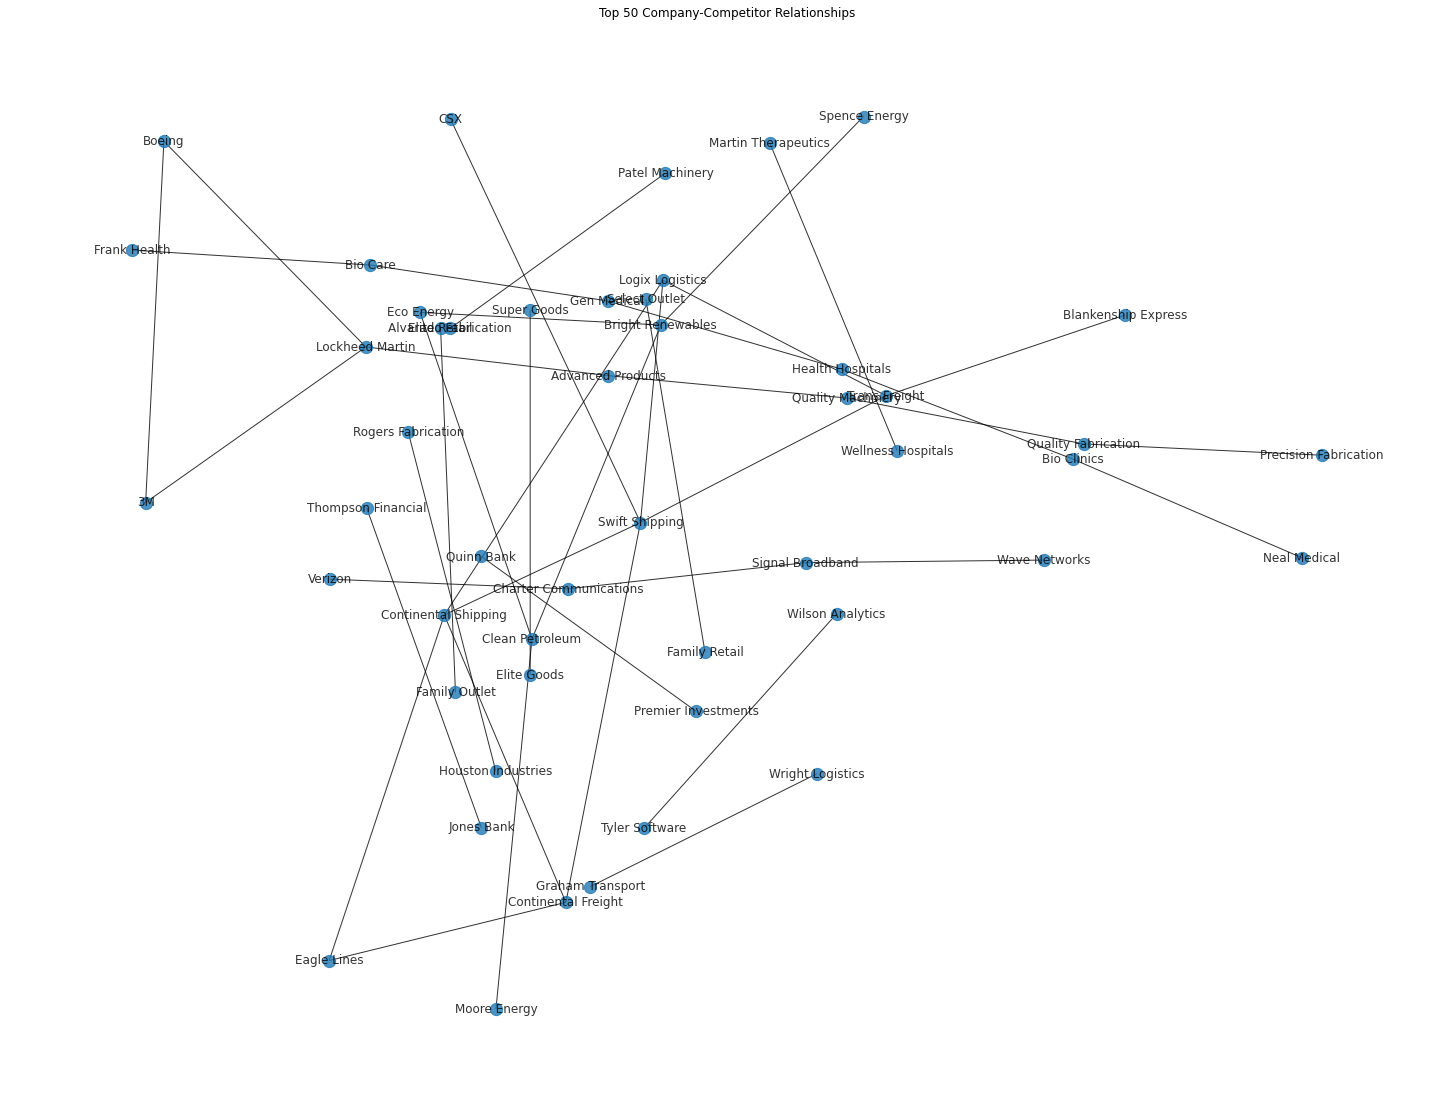

In [107]:
import networkx as nx

# Create a competitor network graph
G = nx.Graph()

# Add edges (company <-> toughest competitor)
for _, row in df.iterrows():
    G.add_edge(row['Company Name'], row['Toughest Competitor'])

# Plot a subset for clarity
plt.figure(figsize=(20, 15))
nx.draw_kamada_kawai(
    G.subgraph(list(G.nodes)[:50]),  # Limit to 50 nodes
    with_labels=True,
    node_size=150,
    alpha=0.8
)
plt.title('Top 50 Company-Competitor Relationships')
plt.show() 

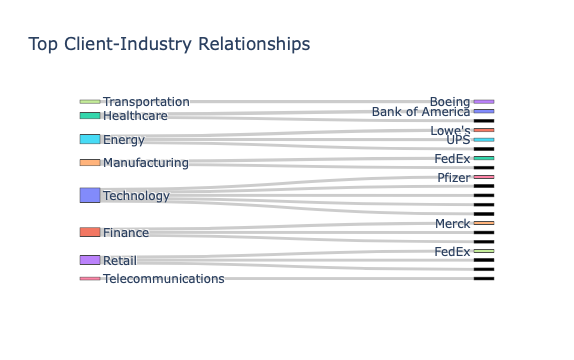

In [43]:
from collections import defaultdict

# Count client-industry pairs
client_industry = defaultdict(int)
for clients, industry in zip(df['Clients'], df['Industry']):
    for client in clients.split(', '):
        client_industry[(client.strip(), industry)] += 1

# Prepare Sankey data (top 20 pairs)
top_pairs = sorted(client_industry.items(), key=lambda x: x[1], reverse=True)[:20]
source = [list(industries.keys()).index(pair[0][1]) for pair in top_pairs]
target = [20 + i for i in range(len(top_pairs))]  # Fake client nodes
value = [pair[1] for pair in top_pairs]

fig = go.Figure(go.Sankey(
    node=dict(
        label=list(industries.keys()) + [pair[0][0] for pair in top_pairs]
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))
fig.update_layout(title='Top Client-Industry Relationships')
fig.show()

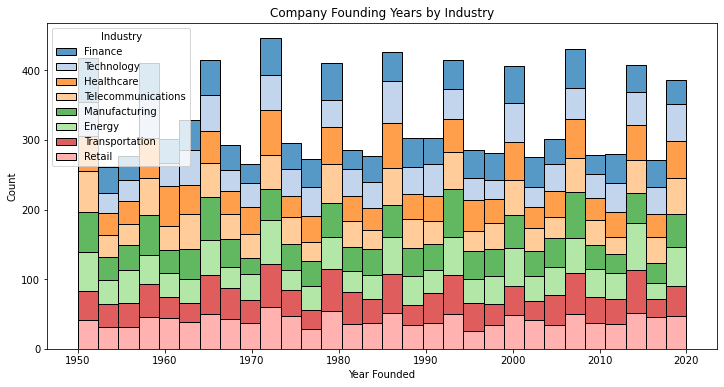

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='Year Founded',
    hue='Industry',
    bins=30,
    multiple='stack',
    palette='tab20'
)
plt.title('Company Founding Years by Industry')
plt.show()

In [47]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [121]:
%sql SELECT Industry, COUNT(*) AS company_count, AVG("Annual Revenue") AS avg_revenue, MIN("Year Founded") AS oldest_company_year FROM companies GROUP BY industry ORDER BY company_count DESC;

 * sqlite:///company.db
   sqlite:///company_value.db
Done.


Industry,company_count,avg_revenue,oldest_company_year
Healthcare,1280,50723168.90851569,1950
Manufacturing,1268,49145858.40253161,1950
Energy,1264,51078573.21254745,1950
Retail,1252,49268285.63202072,1950
Technology,1247,49821959.19083403,1950
Transportation,1245,51323511.04520484,1950
Finance,1229,50539829.29576083,1950
Telecommunications,1215,51417221.08743213,1950


Index(['Company Name', 'Industry', 'Sub Industry', 'City', 'State',
       'Year Founded', 'Annual Revenue', 'Competitors', 'Toughest Competitor',
       'Clients', 'Best Client'],
      dtype='object')


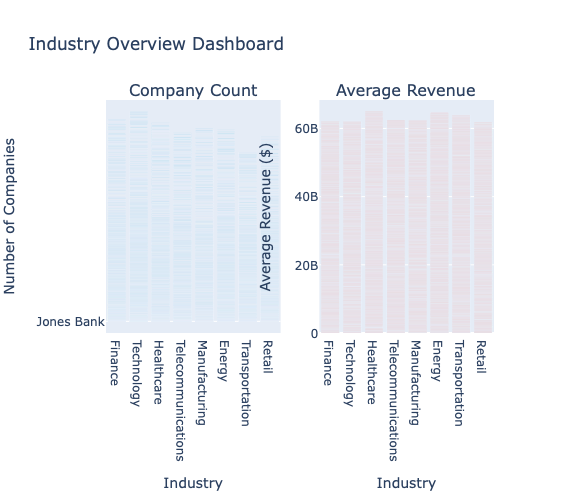

In [128]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# First, verify your SQL query result and column names
print(df.columns)  # Check exact column names in your DataFrame

# Corrected visualization code
fig = make_subplots(rows=1, cols=2, subplot_titles=("Company Count", "Average Revenue"))

# Plot 1: Company Count (check exact column name)
fig.add_trace(
    go.Bar(
        x=df['Industry'], 
        y=df['Company Name'],  # Might need to adjust if your column is named differently
        marker_color='skyblue',
        name='Companies'
    ),
    row=1, col=1
)

# Plot 2: Average Revenue (check exact column name)
fig.add_trace(
    go.Bar(
        x=df['Industry'], 
        y=df['Annual Revenue'],  # Might need to adjust if your column is named differently
        marker_color='salmon',
        name='Revenue ($)'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Industry Overview Dashboard',
    showlegend=False,
    height=500,
    xaxis_title="Industry",
    yaxis_title="Number of Companies",
    xaxis2_title="Industry",
    yaxis2_title="Average Revenue ($)"
)

fig.show()

In [127]:
%sql SELECT * FROM companies LIMIT 5;

 * sqlite:///company.db
   sqlite:///company_value.db
Done.


Company Name,Industry,Sub Industry,City,State,Year Founded,Annual Revenue,Competitors,Toughest Competitor,Clients,Best Client
Jones Bank,Finance,Commercial Banking,New Andrewshire,AL,1963,67993249.25,"Thompson Financial, Heritage Bank",Thompson Financial,"Bio Care, Prime Depot, Rivers Networks, Wolfe Lines, Continental Logistics, NextEra Energy, Johnson Networks",Bio Care
Wilson Analytics,Technology,Cloud Computing,Lake Kathystad,PR,1962,38632496.28,"Next Solutions, Tyler Software, Cloud Networks, Digital Solutions, Innovative Software",Tyler Software,"Prime Goods, Baker Logistics, Bright Power, Hall Products, AbbVie, Duke Energy, Stephens Works, Moore Hospitals",Baker Logistics
Martin Therapeutics,Healthcare,Medical Devices,Jonesland,GA,1998,59992954.41,"Wellness Therapeutics, Life Clinics, Wellness Hospitals, Care Medical, Gen Health",Wellness Hospitals,"Delta Airlines, National Transport, First Advisors, Intel, Chavez Logistics, Green Renewables, Data Solutions",Chavez Logistics
Bio Care,Healthcare,Hospital Systems,Port Anthony,MI,1975,71581948.31,"Vital Pharma, Frank Health, Marquez Medical, Underwood Therapeutics, Care Clinics",Frank Health,"Graham Networks, Link Media, Eco Utilities",Graham Networks
Premier Investments,Finance,Commercial Banking,Phamland,MH,1956,67663090.18,"First Investments, Quinn Bank",Quinn Bank,"General Electric, Care Pharma, Swift Express, Delta Airlines",Care Pharma


In [140]:
%sql SELECT "Toughest Competitor", COUNT(*) AS competitive_pressures FROM companies GROUP BY "Toughest Competitor" LIMIT 20;

 * sqlite:///company.db
   sqlite:///company_value.db
Done.


Toughest Competitor,competitive_pressures
3M,65
AT&T,58
AbbVie,52
Acevedo Therapeutics,1
Adams Advisors,1
Adams Analytics,1
Adams Capital,1
Adams Hospitals,1
Adams Investments,1
Adams Lines,1


In [147]:
%sql SELECT c1.industry AS company_industry, c2.industry AS competitor_industry, COUNT(*) AS cross_industry_competitions FROM companies c1 JOIN companies c2 ON c1."Toughest Competitor" = c2."Company Name" WHERE c1.industry != c2.industry GROUP BY c1.industry, c2.industry ORDER BY cross_industry_competitions DESC;

 * sqlite:///company.db
   sqlite:///company_value.db
Done.


company_industry,competitor_industry,cross_industry_competitions
Telecommunications,Technology,12
Technology,Telecommunications,7


In [149]:
%sql SELECT c1."Company Name", c1.industry, c1."Annual Revenue" AS company_revenue, c1."Toughest Competitor", c2."Annual Revenue" AS competitor_revenue, (c1."Annual Revenue" - c2."Annual Revenue") AS revenue_difference FROM companies c1 JOIN companies c2 ON c1."Toughest Competitor" = c2."Company Name" ORDER BY ABS(revenue_difference) DESC LIMIT 20;

 * sqlite:///company.db
   sqlite:///company_value.db
Done.


Company Name,Industry,company_revenue,Toughest Competitor,competitor_revenue,revenue_difference
Lowe's,Retail,99944914.16,Walmart,1135164.7,98809749.46
Lockheed Martin,Manufacturing,1146871.56,General Electric,99954755.35,-98807883.78999999
Innovative Analytics,Technology,99797106.06,Innovative Networks,1061267.07,98735838.99000001
Data Technologies,Technology,99875415.29,Innovative Labs,1232813.68,98642601.61
ConocoPhillips,Energy,99852554.63,ExxonMobil,1248880.29,98603674.33999999
Facebook,Technology,99924945.01,Apple,1328389.29,98596555.72
Apple,Technology,1328389.29,Facebook,99924945.01,-98596555.72
ConocoPhillips,Energy,99852554.63,ExxonMobil,1312753.45,98539801.17999999
General Electric,Manufacturing,99576000.47,Boeing,1039214.75,98536785.72
United Fabrication,Manufacturing,1181470.07,Industrial Works,99697937.82,-98516467.75
